In [5]:
import pandas as pd
import numpy  as np
import matplotlib as plt
import random

In [6]:
df1 = pd.read_csv('./datasets/dataset_02_11.csv', sep=',')
#df1 = pd.read_csv('./teste_02_11.csv', sep=',')
#df1.dtypes
df1 = df1[['compute_version','registers','smem','cmem','num_of_cores','L2','bandwith','theoretical_flops','AppId','number_of_lines_kernel','occupancy','input_size','duration','block_x']]
df1 = df1.select_dtypes(exclude=['object'])
#df1 = df1[['compute_version','registers','smem','cmem','AppId','number_of_lines_kernel','occupancy','duration','block_x']]
#df1.dtypes
#df1 = pd.read_csv('./da.csv', sep=',', names=['null','AppName','block_x','compute_version','registers','smem','cmem', 'number_of_lines_kernel','occupancy','AppId'])
#df1 = df1.drop(columns= ["null"], axis = 1)
#df1['AppId'].unique()
#df1.isnull().sum()
#df1[df1['AppId'] == 5].tail()

In [3]:
#df1 = df[['AppName','compute_version','registers','smem','cmem','gpu_id','gpu_name','l1_cache_used','max_clock_rate','num_of_cores','L2','bus','memory_clock','bandwith','GM','num_sm','num_cores_sm','theoretical_flops','AppId','number_of_lines_kernel','occupancy','input_size', 'duration','grid_x','grid_y','block_x','block_y']]
#df1 = df[['AppName','compute_version','registers','smem','cmem','gpu_id','gpu_name','max_clock_rate','num_of_cores','L2','bus','memory_clock','bandwith','GM','num_sm','num_cores_sm','theoretical_flops','AppId','number_of_lines_kernel','occupancy','duration','grid_x','grid_y','block_x','block_y']]

#df1 = df1.sort_values(by='AppId', ascending=True)
#df1['AppId'] = pd.to_numeric(df1['AppId'])
#df1[['registers','smem','cmem','gpu_id','max_clock_rate','num_of_cores','bus','memory_clock','GM','num_sm','num_cores_sm','AppId','number_of_lines_kernel','occupancy','duration','grid_x','grid_y','block_x','block_y']] = df1[['registers','smem','cmem','gpu_id','max_clock_rate','num_of_cores','bus','memory_clock','GM','num_sm','num_cores_sm','AppId','number_of_lines_kernel','occupancy','duration','grid_x','grid_y','block_x','block_y']].astype(float)
df1 = df1.select_dtypes(exclude=['object'])
#df1 = df1.drop(columns= ["Unnamed: 0"], axis = 1)
#df1.to_csv('testando.csv')
#df1=df1.dropna()
#df1.dtypes
#df1.isnull().sum()


In [7]:
from sklearn import metrics

#def mean_absolute_percentage_error(y_true, y_pred): 
#    y_true, y_pred = np.array(y_true), np.array(y_pred)
#    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [80]:
#def smape(a, f):
#    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

In [8]:
for i in range(1,10):
    print(i)
    c = len(df1.loc[df1['AppId'] == i])
   
    while  c < 1000:
        #print(len(df1.loc[df1['AppId'] == i]))
        ids = list(df1.loc[df1['AppId'] == i].index)
        new_row = df1.iloc[random.choice(ids)]
        df1 = df1.append(new_row, ignore_index=True)
        c += 1
        #print(len(df1))

1


/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

2


/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

3


/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

4


/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

5


/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

6


/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

7
8
9


/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10107/2079936108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

#regressor = RandomForestRegressor(max_depth=10, n_estimators=100, random_state=0)
regressor = RandomForestRegressor(n_estimators = 200, random_state =42, max_depth=10, max_features=12)
print('Random Forest Regressor')
for idApp in range(1,10):
  idApp = float(idApp)
  
  X_train = df1[df1['AppId'] != idApp]
  Y_train = df1[df1['AppId'] != idApp]['duration']
  X_test = df1[df1['AppId'] == idApp]
  Y_test = df1[df1['AppId'] == idApp]['duration']
  
  yTrain = np.log(Y_train + 0.001)
  yTest = np.log(Y_test + 0.001)
  
  regressor.fit(X_train, yTrain)

  y_pred = regressor.predict(X_test)
  print('Application: ',idApp, 'Percentage: ', mean_absolute_percentage_error(yTest, y_pred))


Random Forest Regressor
Application:  1.0 Percentage:  0.07780671809506569
Application:  2.0 Percentage:  0.008072707539024702
Application:  3.0 Percentage:  0.011483757291758408
Application:  4.0 Percentage:  0.05243419613448481
Application:  5.0 Percentage:  0.0044737251921465465
Application:  6.0 Percentage:  0.0004043528171176402
Application:  7.0 Percentage:  0.0016226017360634133
Application:  8.0 Percentage:  0.0015576435698455742
Application:  9.0 Percentage:  0.02318318650012319


regressor = RandomForestRegressor(n_estimators = 200, random_state =42, max_depth=10, max_features=12)

Application:  1.0 Percentage:  0.3943098258041423
Application:  2.0 Percentage:  0.30318749242351867
Application:  3.0 Percentage:  0.27662550697294747
Application:  4.0 Percentage:  0.986445564886126
Application:  5.0 Percentage:  0.06440032098206748
Application:  6.0 Percentage:  0.024321567133716557
Application:  7.0 Percentage:  0.04196004803784913
Application:  8.0 Percentage:  0.012458703549203497
Application:  9.0 Percentage:  0.09743224872503077

/home/luan/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/luan/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


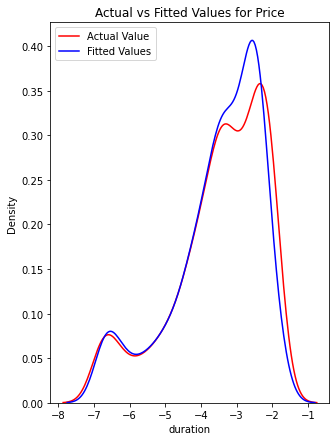

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 7))


ax = sns.distplot(yTest, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values",ax=ax)


plt.title('Actual vs Fitted Values for Price')
plt.legend()


plt.show()
plt.close()

smape 100
Application:  1.0 MAPE:  13.041942603834379
Application:  2.0 MAPE:  0.16740623110311517
Application:  3.0 MAPE:  0.1842894766851608
Application:  4.0 MAPE:  0.189450528794812
Application:  5.0 MAPE:  0.14189047299770463
Application:  6.0 MAPE:  0.5376591427967221
Application:  7.0 MAPE:  0.13566828403300812
Application:  8.0 MAPE:  0.148245600785159
Application:  9.0 MAPE:  0.16585427440912995